In [21]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

# Neural Network

In [22]:
df = pd.read_csv("classification_nonlinear_xor.csv")
df.loc[ df["y"] == -1, "y"] = 0 
df.head()

# df = pd.read_csv("classification_circle.csv")
# df.loc[ df["y"] == -1, "y"] = 0 
# df.head()

,x1,x2,y
0,2.415993,4.922784,1
1,4.489238,3.196620,1
2,4.935055,3.699012,1
3,1.589000,2.737612,1
4,2.112737,1.538858,1


In [23]:
feature_cols = ['x1', 'x2']
X = df[feature_cols].to_numpy()
y = df['y'].to_numpy()

In [24]:
%matplotlib notebook
%matplotlib notebook

def animate_nn(i, *fargs):
    clf, X, y, df, xx, yy = fargs
    clf.fit(X, y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.cla()
    plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.Paired
    )
    contours = plt.contour(xx, yy, Z, linewidths=2, colors="white")
    sns.scatterplot(x="x1", y="x2", hue="y", data=df)
    plt.xlim(-6, 6)
    plt.ylim(-6, 6)
    plt.legend(loc='lower right')


<IPython.core.display.Javascript object>


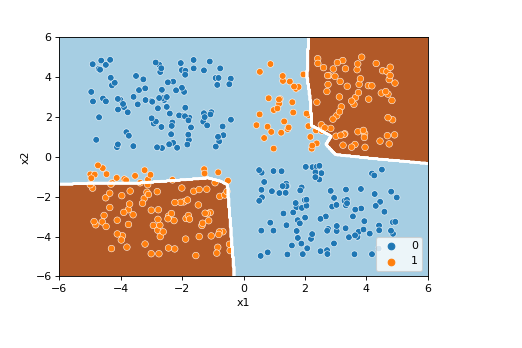

In [25]:
clf = MLPClassifier(activation="relu", solver='adam', alpha=0.03, hidden_layer_sizes=(8, 4),
                    random_state=42, max_iter=2, warm_start=True)
xx, yy = np.meshgrid(np.linspace(-6, 6, 500), np.linspace(-6, 6, 500))
anim = FuncAnimation(plt.gcf(), func=animate_nn, fargs=(clf, X, y, df, xx, yy), interval=100, frames=200)
plt.show()

# Logistic Regression

In [26]:
# df = pd.read_csv("classification_linear_uniform.csv")
# df.loc[ df["y"] == -1, "y"] = 0 
# df.head()

df = pd.read_csv("classification_nonlinear_xor.csv")
df.loc[ df["y"] == -1, "y"] = 0 
df.head()

,x1,x2,y
0,2.415993,4.922784,1
1,4.489238,3.196620,1
2,4.935055,3.699012,1
3,1.589000,2.737612,1
4,2.112737,1.538858,1


In [51]:
feature_cols = ['x1', 'x2']
X = df[feature_cols].to_numpy()
y = df['y'].to_numpy()

In [28]:
%matplotlib notebook
%matplotlib notebook

def animate_lr(i, *fargs):
    clf, X, y, df = fargs
    clf.fit(X, y)
    
    b = clf.intercept_[0]
    w1, w2 = clf.coef_.T
    b = -b/w2
    theta = -w1/w2

    xmin, xmax = -6, 6
    ymin, ymax = -6, 6
    xd = np.array([xmin, xmax])
    yd = theta*xd + b
    
    plt.cla()
    plt.plot(xd, yd, 'w', lw=3)
    plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.4)
    plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.4)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    sns.scatterplot(x="x1", y="x2", hue="y", data=df)
    plt.legend(loc='lower right')

<IPython.core.display.Javascript object>


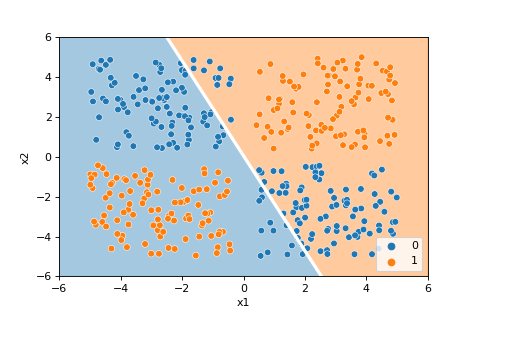

In [29]:
clf = LogisticRegression(max_iter=1, warm_start=True)
anim = FuncAnimation(plt.gcf(), func=animate_lr, fargs=(clf, X, y, df), interval=200, frames=300)
plt.show()

# Linear Regression

In [61]:
def gradient_descent(X, y, lr=0.001, epoch=12):
  b1, b0 = 0.0, 0.0 # parameters
  b1_list, b0_list = [], []
  log, mse = [], [] # lists to store learning process
  # GRADIENT DESCENT ALGORITHM
  for i in range(epoch):
    sumyhat = 0
    sumxyhat = 0
    # CALCULATE SUM PORTIONS; COULD HAVE VECTORISED HERE
    for j in range(len(X)):
      sumyhat += b0 + b1*X[j] - y[j]
      sumxyhat += (b0 + b1*X[j] - y[j])*(X[j])
    # CALCULATE AND UPDATE b1 AND b0
    b1 -= lr*(1/len(X))*sumxyhat
    b0 -= lr*(1/len(X))*sumyhat
    b1_list.append(b1)
    b0_list.append(b0)
    # COULD HAVE ADDED THE CONDITION HERE
    # BUT MATHEMATICALLY IT SEEMED THAT THE THRESHOLD VALUE WOULD BE DIFFICULT TO ACCURATELY PUT IN
    # AND THE NUMBER OF EPOCHS CHOSEN HERE (20) OR EVEN 10 TIMES HIGHER IS MORE 

    # UPDATE LOGS AND MSES
    log.append((b1, b0))
    mse.append(mean_squared_error(y, (b1*X + b0)))        
    
  return b1, b0, log, mse,b1_list,b0_list

In [62]:
#Clearing the previous plots and contrusting the dataset
plt.clf()
X = range(20)
y = X + np.random.randn(20)

#Visualizing the dataset
plt.scatter(X,Y);

<IPython.core.display.Javascript object>


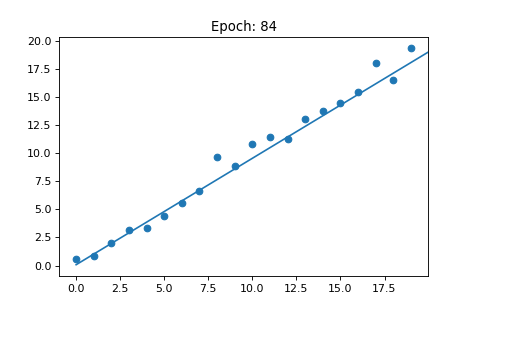

In [63]:
ep = 200
alpha = 0.0003

w,b,_,_,w_list, b_list = gradient_descent(X,y,lr= alpha, epoch = ep)

figure, ax = plt.subplots()
plt.scatter(X,y)
x_graph = np.linspace(0,20,100)
y_graph = []

# Setting limits for x and y axis
# ax.set_xlim(0, max(x)) #Optional
# ax.set_ylim(0, 20) #Optional

# Since plotting a single graph
line, = ax.plot(0, 0)

def animation_function(i):
    #x.append(i*0)
    y_graph = w_list[i-1]*x_graph + b_list[i-1]
    plt.title("Epoch: {}".format(i))
    line.set_xdata(x_graph)
    line.set_ydata(y_graph)
    return line,

animation = FuncAnimation(figure,
                        func = animation_function,
                        frames = ep,
                        interval = 20)
plt.show()